## HW2 - Model Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import MatrixMethods as mm
from SingleImage import SingleImage
from ImageBlock import ImageBlock
from BlockSimulation import *
from scipy import linalg as la
from functools import partial


# Set print options to suppress scientific notation
np.set_printoptions(suppress=True)

## Part 1 - Simulate block of images with multiple flight strips

In [2]:
# define random seed
np.random.seed(0)

a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2, tie_pattern='4 corners', control_pattern='random block',num_control_points=5, rotaions_sigma=10, altitude=1000)

block = a.simulate_block()

In [3]:
len(block.images)

4

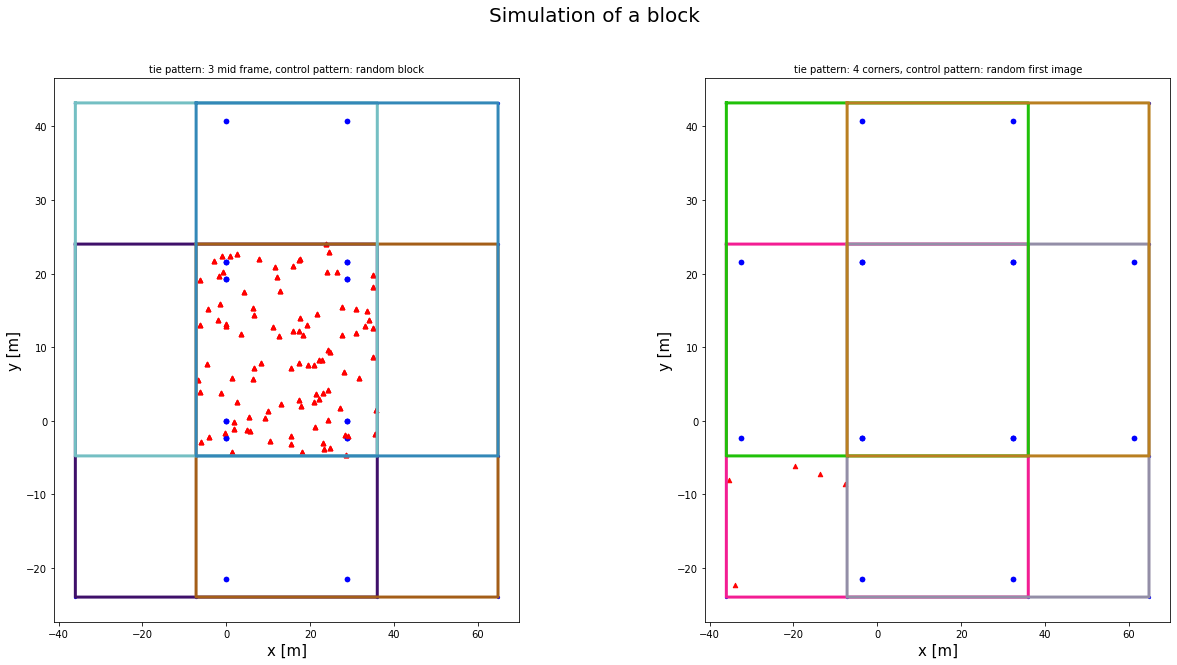

In [4]:
# define random seed
np.random.seed(0)

# plot different arguments options for the simulation using subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Simulation of a block', fontsize=20)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2,  tie_pattern='3 mid frame', control_pattern='random block',num_control_points=100, rotaions_sigma=10, altitude=100)
block = a.simulate_block()
block.draw_block(ax = axes[0])
# add title to the plot usimg the parameters of the simulation
axes[0].set_title('tie pattern: 3 mid frame, control pattern: random block', fontsize=10)
axes[0].set_xlabel('x [m]', fontsize=15)
axes[0].set_ylabel('y [m]', fontsize=15)
# axes[0].axis('equal')

np.random.seed(0)
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=2, num_strips=2,  tie_pattern='4 corners', control_pattern='random first image', num_control_points=5, rotaions_sigma=10, altitude=100)
block = a.simulate_block()
block.draw_block(ax = axes[1])
axes[1].set_title('tie pattern: 4 corners, control pattern: random first image', fontsize=10)
axes[1].set_xlabel('x [m]', fontsize=15)
axes[1].set_ylabel('y [m]', fontsize=15)
# axes[1].axis('equal')

plt.show()
# fig.savefig('Simulation of a block.png')


## Calculate condition number of the block

In [5]:
np.random.seed(0)
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=4, num_strips=3,  tie_pattern='4 corners', control_pattern='random block',num_control_points=5, rotaions_sigma=10, altitude=100)
block = a.simulate_block()

<function matplotlib.pyplot.show(close=None, block=None)>

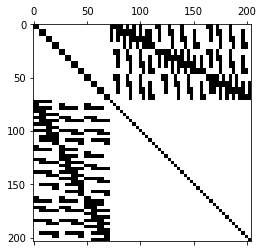

In [6]:
lb = block.create_lb_vector()
X = block.compute_variables_vector()
l0 = block.compute_observation_vector()
L = lb - l0
A = block.ComputeDesignMatrix()
N = np.dot(A.T, A)
plt.spy(N)
plt.show

In [7]:
# compute the eigenvalues of N
eigvals = la.eigvals(N)
# print(eigvals)
# compute the condition number of N
cond = np.max(eigvals)/np.min(eigvals)
cond

(590083640.6784041+0j)

In [8]:
SimulateBlock.add_noise_to_block(block, sigma_location=0.5, sigma_rotation=100, sigma_image_points=1, sigma_tie_points=0.5)
X,RMSE = block.BundleAdjustment(0.01,100,method = 'naive')

iteration:  1 
 condition number:  (585540231.0611079+0j) 

iteration:  2 
 condition number:  (590069026.732471+0j) 

iteration:  3 
 condition number:  (590083630.2374909+0j) 



In [9]:
# compute the covariance matrix
Cov = np.linalg.inv(N)
# compute the standard deviation of the observations
sigma_l = np.sqrt(np.diag(Cov))
# compute the standard deviation of the unknowns
sigma_X = np.sqrt(np.diag(Cov))
# compute the correlation matrix
corr = Cov / np.outer(sigma_l, sigma_l)

print('Observation standard deviation: \n', sigma_l)
print('Unknowns standard deviation: \n', sigma_X)
print('Correlation matrix: \n', corr)

Observation standard deviation: 
 [22.96841188 30.63837455  7.59418095  0.30193855  0.22842349  0.04504911
 15.22091884 28.52514429  4.58879467  0.28250695  0.1491577   0.02723328
 11.47648759 28.4832192   3.56569409  0.28193817  0.10892117  0.02320029
 20.78194568 30.6576794   5.83819789  0.3023598   0.20235178  0.03643676
 23.17456644 28.08299817  7.89792876  0.27682979  0.2299914   0.03816607
 15.0406267  25.92297408  3.9407745   0.25750981  0.1472308   0.02471611
 10.51423025 25.23441653  3.24466158  0.25115192  0.10085405  0.02152232
 20.38571359 27.95046503  5.33781578  0.27641022  0.19886888  0.03143596
 23.9580463  32.40535516 10.86527186  0.31837595  0.23429916  0.05073338
 15.68547166 30.08158287  7.62174014  0.29913806  0.15152839  0.03289891
 12.65901496 29.37379208  7.20883032  0.29329127  0.12158832  0.03145678
 20.98896599 31.98099571  8.71216253  0.31722403  0.20224559  0.04650755
  1.6749067   2.08149992 10.92395645  4.95896903  2.58854229 16.41994857
  0.88588174  0.8